![title](http://www.wellbeingatschool.org.nz/sites/default/files/W@S-different-boxplots.png)

On this notebook, we'll cover other types of plots. In order: **Stacked Bar Charts**, **Correlation plots** and **Box Plots**. Let's first start with Stacked Bar Charts.  

## Stacked Bar Charts

If you have a job,  and have ever attended to some business meeting, you'll probably have seen one of these: 

![title](https://www.mathsisfun.com/data/images/pie-chart-movies.svg)

These are called **Pie Charts** and are used to visualize segments of the "whole" against each other. However, its purpose is harder to accomplish when working with a lot of categories, and when trying to work with exact numbers. Thus, pie charts only see use when trying to compare percentages more than anything. However, an alternative to these charts are **Stacked Bar Charts**, which are similar to the previously seen Bar Charts, but now better suited at comparing several categories  and their numerical values. 

Let's see this in action with the **mtcars** dataset:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cars = pd.read_csv("cars.csv")
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Let's compare the unique values of gears, with cylinders, and see how they stack on their miles per gallon value.

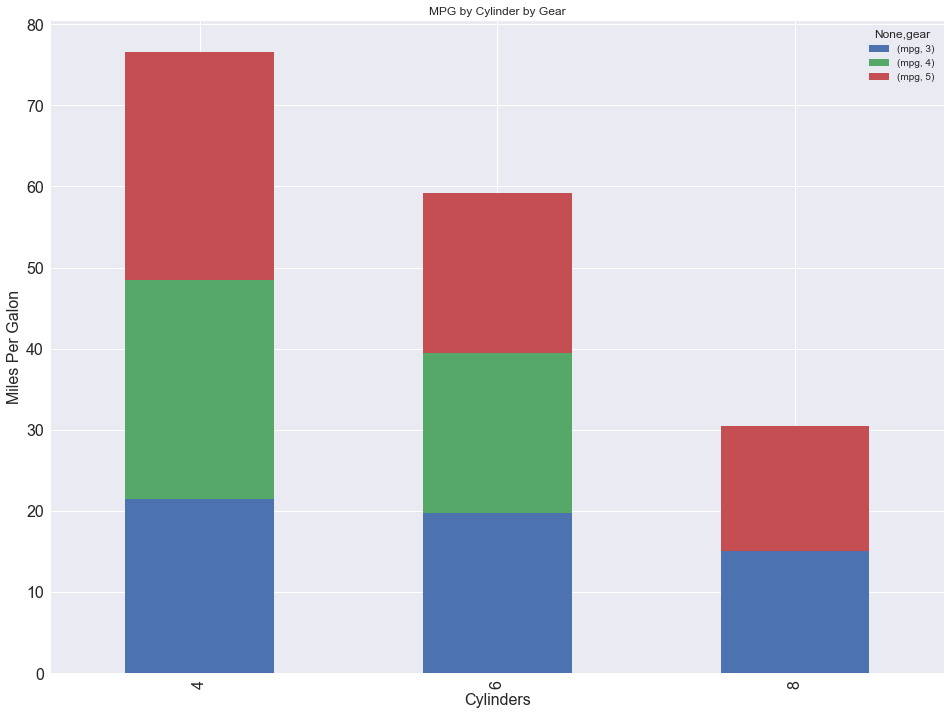

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

def Plot_Stacked(data,cat1,cat2,title,typ = 'bar'):
    new_data = data.unstack()
    my_plot = new_data.plot(kind=typ,stacked=True,title=title,fontsize=16)
    my_plot.set_xlabel(cat1,fontsize=16)
    my_plot.set_ylabel(cat2,fontsize=16)
    plt.show()
    
gcm = cars[["mpg","cyl","gear"]]
gcm = gcm.groupby(['cyl','gear']).mean()
Plot_Stacked(gcm,"Cylinders","Miles Per Galon","MPG by Cylinder by Gear")

It seems that the cars that go the most miles per galon, are those that have 5 gears and 4 cylinders, while cars with 8 cylinders have an almost even amount of miles per galon, with 3 or 5 gears. Interestingly enough, cars with 8 cylinders don't have 4 gears.  The y axis represents the total miles per galon for each kind of cylinder, while the miles per galon for each type of gear has to be inferred by the size of the colored bar. Still, this does a much better job than Pie charts! We could also make it horizontal by changing the **typ** parameter of the function. 

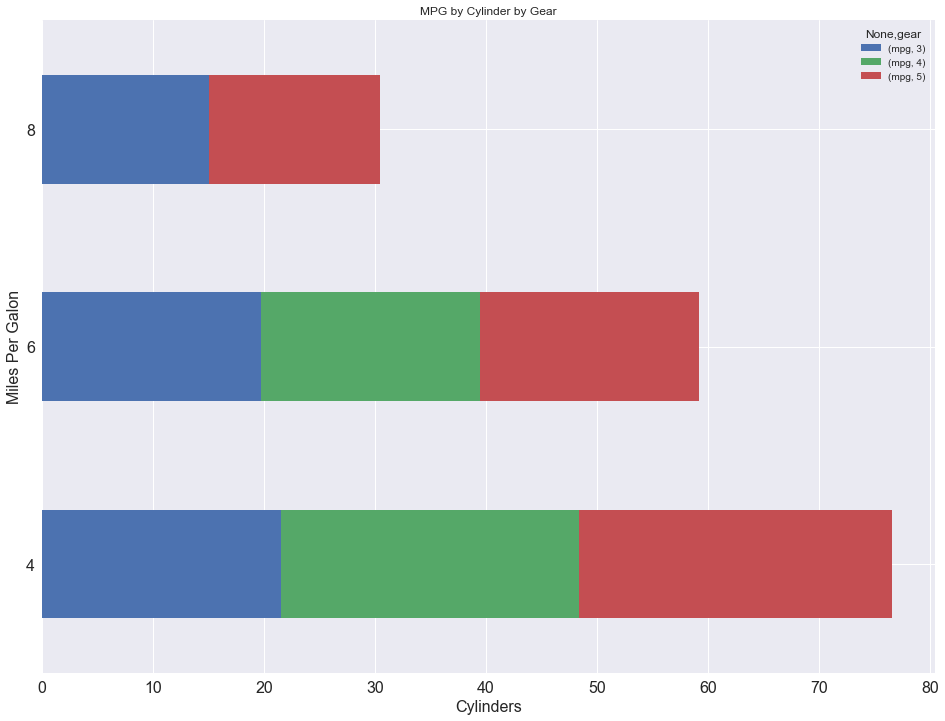

In [4]:
Plot_Stacked(gcm,"Cylinders","Miles Per Galon","MPG by Cylinder by Gear",typ = "barh")

#### Your turn now. 

Create a Stacked Bar Chart comparing Miles Per Galon based on the number of cylinders and carburators. 

In [5]:
#Your code here.

## Correlation Plots.

Correlation plots are meant to describe the relationship between a lot of numeric variables on a dataset. Think of a scatterplot, but more concise and applied to multiple variables. These are generally presented as heatmaps, ranging from positive to negative values. The Pearson Correlation coefficient formula is as follows: 

![title](http://www.statisticshowto.com/wp-content/uploads/2012/10/pearson.gif)



Where x and y are the two variables.  

The result gives a positive or negative number between -1 and 1. If the number is positive, as one variable increases, the other also increases. If negative, as one variable increases, the other decreases. Think of it as we saw scatterplots before:

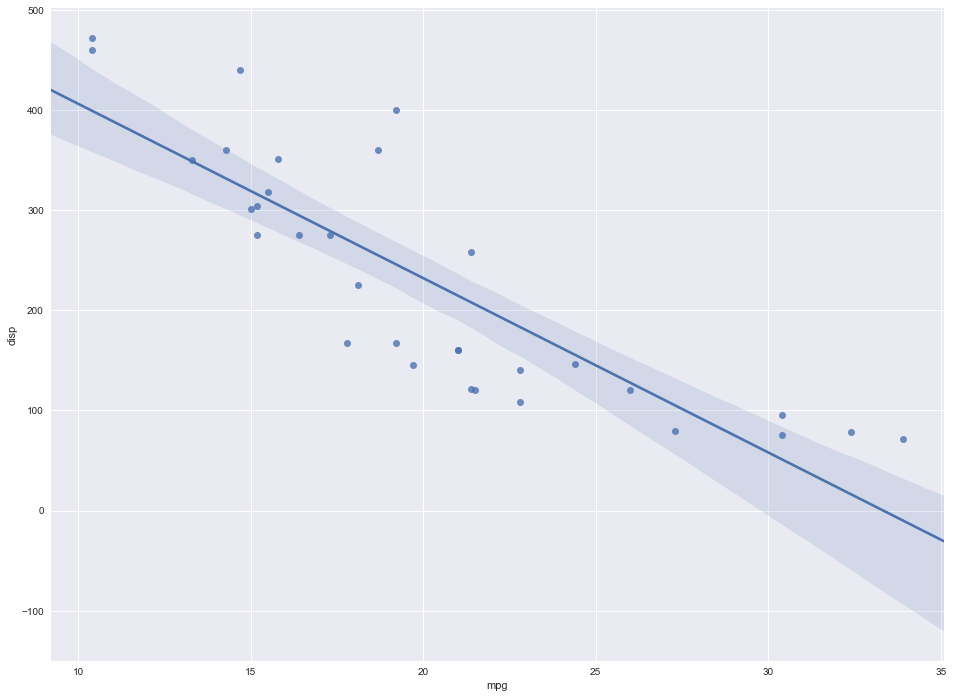

In [6]:
ax = sns.regplot(x = "mpg", y = "disp", data = cars)
plt.show()

In this example, as mpg increases, disp decreases. This is a **negative** correlation. But, our correlation plot, does it for all variables in a comfortable matrix.

In [7]:
#First create the correlation matrix.
corr = cars.corr()
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Right of the bat we see some strong negative and positive correlations between the variables. Let's plot a correlation plot or heatmap to better visualize these relationships.

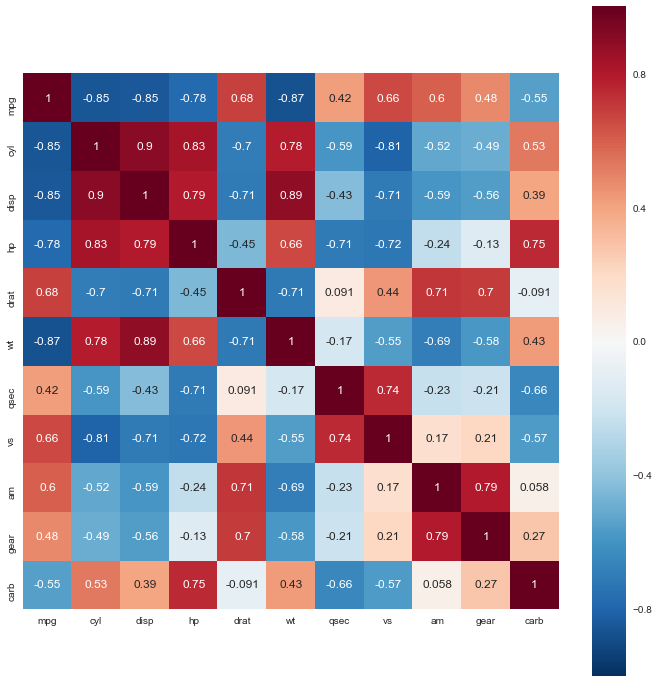

In [8]:
rcParams["font.size"] = 12
plt.matshow(corr)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True)
plt.show()

Much better!  This is more visually appealing and brings the relevant information right to your eyes. For example,  higher cyl and disp values lead to lower miles per galon, while disp and the number of cylinders are very strongly correlated. A word of caution however, is that **correlation is not causation**! Just because to features have a strong correlation factor, does not necessarily mean that one causes the other to change. This must be tested exhaustively. 

#### Your turn now. 
Modify the previous heatmap to use a different color map and without the color bar on the right. This link may be useful: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [9]:
# Your code here.

## Box Plots

Box plots are a very useful way of representating the distribution of a value, in particular for finding outliers. Box plots who the data between the first quartile (25%) and the third quartile (75%) in a neat box with the median as a line in the middle, while the rest of the data is  represented as a T-shaped line and perceived outliers are represented as dots. Let's apply this to the number of miles per gallon based on the number of cylinders.

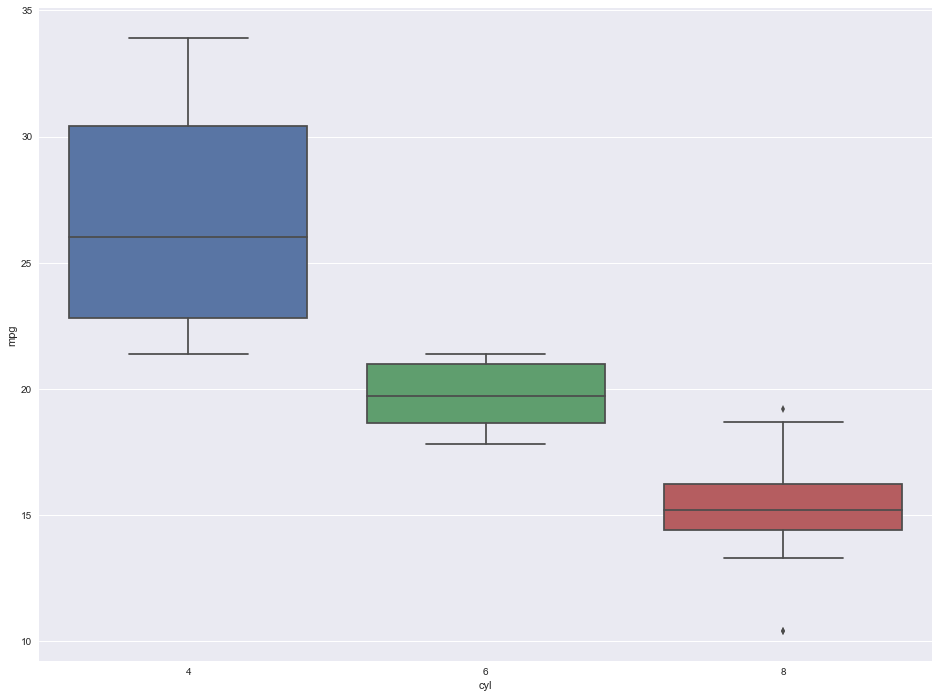

In [15]:
box = sns.boxplot(x="cyl", y = "mpg", data=cars)
plt.show()

Here we can visualize how boxplots help us understand the distribution of a value for several categories in one go. Cars with 4 cylinders have the most variation when it comes to miles per gallon, cars with 6 cylinders have a fairly even distribution of miles per galon, and most of the values of miles per galon for 8 cylinders are over the third quartile. There's also two perceived outliers on cars with 8 cylinders, one that's too low and one that's too high. 

We can also create boxplots for just one variable, for similar results.

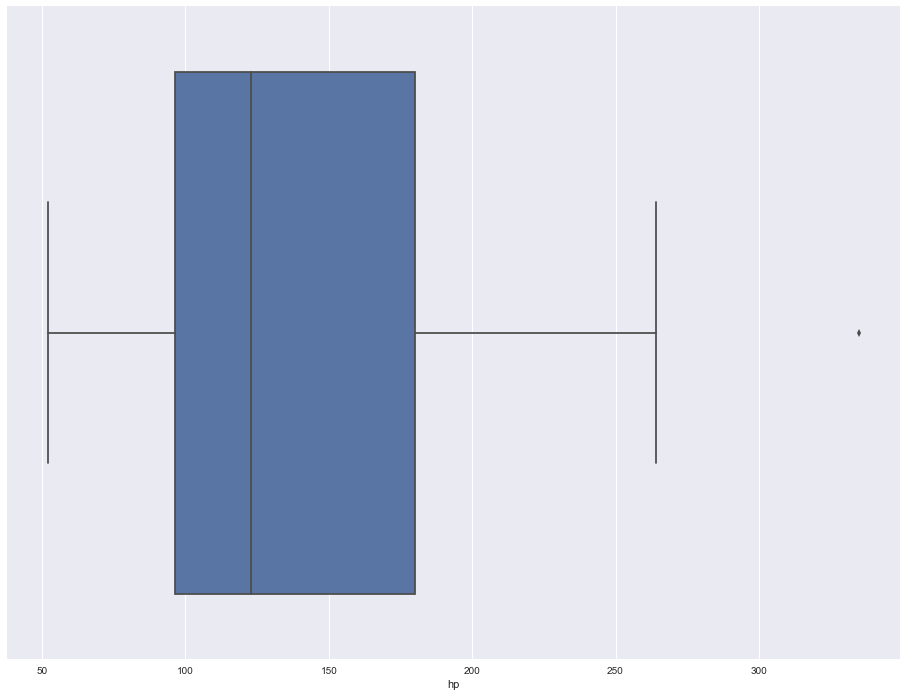

In [16]:
single_box = sns.boxplot(x = cars["hp"])
plt.show()

For the distribution of horsepower, most values are found above the median, so most cars have higher horsepower values. There's also one outlier at almost 350 horsepower. So these single boxplots are a more summarized version of histograms, and you'll find an use for each one in your Data Science work. 

#### Your turn now. 

Create a grouped box plot that  compares miles per galon for each unique number of carburators. 

In [17]:
#Your code here.

To summarize:

- Use Stacked Bar Charts when comparing parts to the whole, where the actual value matters instead of the percentage.
- Use Correlation plots when comparing the relationship of all the values of the dataset.    
- Use Box Plots when comparing one or multiple distributions, or when trying to find outliers. 

## Further Reading

- Seaborn docs: http://seaborn.pydata.org/

There are many more plots than the one I've shown here. Never stop finding new ways to visualize data!

## Exercise 

Create each of the visualizations we saw in this notebook on the IRIS dataset. I've loaded it already for you.

In [23]:
iris = pd.read_csv("IRIS.csv")
iris = iris.drop("Unnamed: 0", axis = 1)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
